<center><h1>Logistic Regression from scratch using Python</h1></center>

![Foo](https://imgur.com/10nqpqw.png)

![](https://imgur.com/Bw5gMJX.jpg)


<h2>Introduction: What is Logistic Regression?<br></h2>
Logistic regression is a regression analysis that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category. For this particular notebook we will try to predict whether a customer will churn using a Logistic Regression.<br><br>
**Prerequisites:**
1. Python knowledge
1. Atleast basic differential calculus 
1. Matrix algebra


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import time

init_notebook_mode(connected=True)   

<h2>Objectives:<br></h2>
* To learn the theory behind Logistic Regression (Mathematical part, ugh).
* To be able to implement the Logistic Regression without using built-in Logistic Regression libraries.
* To be able to predict whether a customer will churn or not.


<h2>Logistic Regression behind the mask</h2>

Before we start coding let us first understand or atleast try to understand the things happening at the back-end of Logistic Regression. The aim of this section, **Logistic Regression behind the mask** is to explain the math behind Logistic Regression and to accomplish the first objective of this kernel. To be able to do this we must answer the question, how does a Logistic Regression work? In theory, a Logistic regression takes input and returns an output of probability, a value between 0 and 1. How does a Logistic Regression do that? With the help of a function called a *logistic function* or most commonly known as a *sigmoid*. This sigmoid function is reponsible for *predicting* or classifying a given input.
Logistic function or sigmoid is defined as:
![](https://imgur.com/Bw5gMJX.jpg)
Where:
* *e* = Euler's number which is **2.71828**.
* *x0* = the value of the sigmoid's midpoint on the x-axis.
* *L* = the maximum value.
* *k* = steepness of the curve.

For Logistic Regression however here is the definition of the logistic function:<br>
![](https://imgur.com/903IYoN.jpg)
Where:
* Θ = is the weight.

In python code:

In [5]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

From here, there are two common ways to approach the optimization of the Logistic Regression. One is through loss minimizing with the use of **gradient descent** and the other is with the use of **Maximum Likelihood Estimation**. I will try to explain these two in the following sections.

<h4>1. Loss minimizing</h4><br>
Weights (represented by theta in our notation) is a vital part of Logistic Regression and other Machine Learning algorithms and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function. [[1]](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac) <br><br>
The loss function is defined as:
![](https://imgur.com/riDHhZS.jpg)
Where:
* m = the number of samples
* y = the target class

In python:

In [6]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

The goal is to **minimize the loss**  by means of increasing or decreasing the weights, which is commonly called fitting. Which weights should be bigger and which should be smaller? This can be decided by a function called **Gradient descent**. The Gradient descent is just the derivative of the loss function with respect to its weights. Below links explains how Gradient descent is derived (I'm just too lazy to explain it): <br>
* [https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#step-by-step](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#step-by-step)
* [http://mccormickml.com/2014/03/04/gradient-descent-derivation/](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)

![](https://imgur.com/rBVzJbt.jpg)
The weights are updated by substracting the derivative (gradient descent) times the learning rate, as defined below:
![](https://imgur.com/TAIpnwI.jpg)
Where:
* α = learning rate (usually 0.1)

In python:

In [7]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

So, we've finished covering one of the steps on LR optimization **Loss minimization** with the use of gradient descent. We will now jump to maximum likelihood estimation.

<h4>2. Maximum likelihood estimation</h4><br>
One step to optimize logistic regression is through likelihood estimation, the goal here is to **maximize the likelihood** we can achieve this through Gradient ascent, not to be mistaken from gradient descent. Gradient ascent is the same as gradient descent, except its goal is to maximize a function rather than minimizing it.<br>
Maximum likelihood:
![](https://imgur.com/VCU0TKj.jpg)
z is defined above

In python:

In [8]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

Now, the gradient of the log likelihood is the derivative of the log likelihood function. The full derivation of the maximum likelihood estimator can be found [here](https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/) (too lazy to explain again).
![](https://imgur.com/Uvo3rPv.jpg)
The weights are now updated by adding the derivative (gradient ascent) times the learning rate, as defined below:
![](https://imgur.com/hIB0LQ0.jpg)

In [9]:
def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

Now I think we're done understanding the math behind Logistic Regression, just a recap:<br>
1. We learned that Logistic Regression can be used for Classification because the output is a number between 0 and 1.
1. We understood the two common ways of optimizing Logistic Regression, minimizing the loss and the other is maximizing the likelihood.
1. We learned the difference between Gradient descent and gradient ascent.<br>

If you want to add more, or if there's something wrong with the things I stated above or you want to share an improvement, please feel free to leave a comment.

Looks like we've completed our first objective, let's get to coding now.

<h2>Python implementation</h2>

Let us now start implementing what we learned from the previous section into python codes. We will use the Telco Customer Churn data ofcourse, by the end of this section we will be able to make predictions using our "home-made" Logistic Regression.

**Dataset initialization**

In [10]:
data = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [11]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [12]:
df = data.copy()

That's a lot of columns, to simplify our experiment we will only use 2 features **tenure** and **MonthlyCharges** and the target would be **Churn**  ofcourse. Let us do a simple EDA and visualization on our features and target.

<h3>EDA: Independent variables</h3>

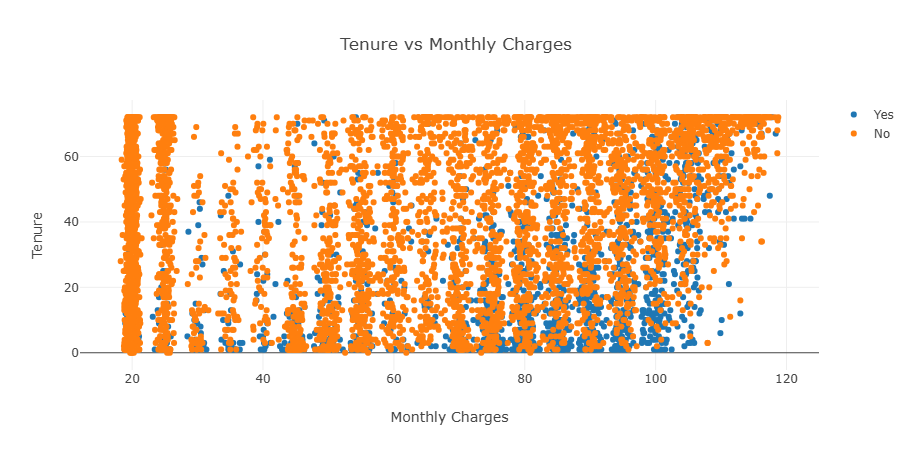

In [13]:
churns = ["Yes", "No"]
fig = {
    'data': [
        {
            'x': df.loc[(df['Churn']==churn), 'MonthlyCharges'] ,
            'y': df.loc[(df['Churn']==churn),'tenure'],
            'name': churn, 'mode': 'markers',
        } for churn in churns
    ],
    'layout': {
        'title': 'Tenure vs Monthly Charges',
        'xaxis': {'title': 'Monthly Charges'},
        'yaxis': {'title': "Tenure"}
    }
}

py.offline.iplot(fig)

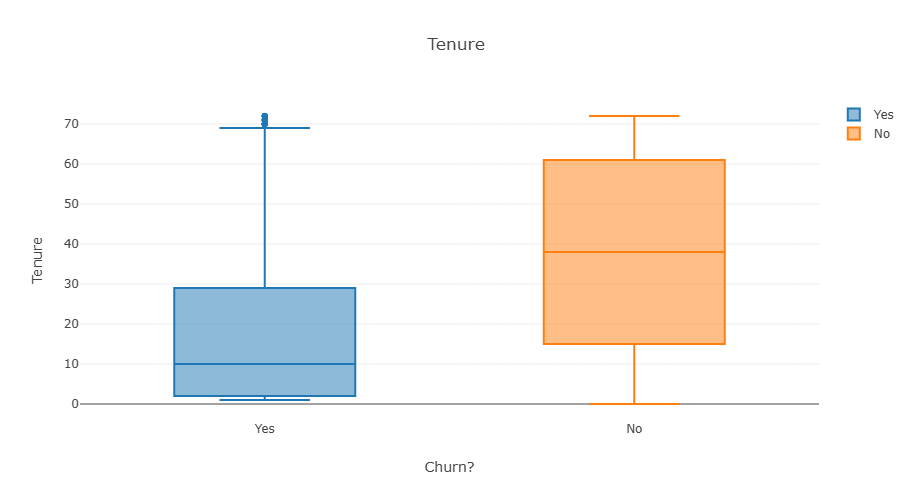

In [14]:
figs = []

for churn in churns:
    figs.append(
        go.Box(
            y = df.loc[(df['Churn']==churn),'tenure'],
            name = churn
        )
    )
layout = go.Layout(
    title = "Tenure",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "Tenure"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)

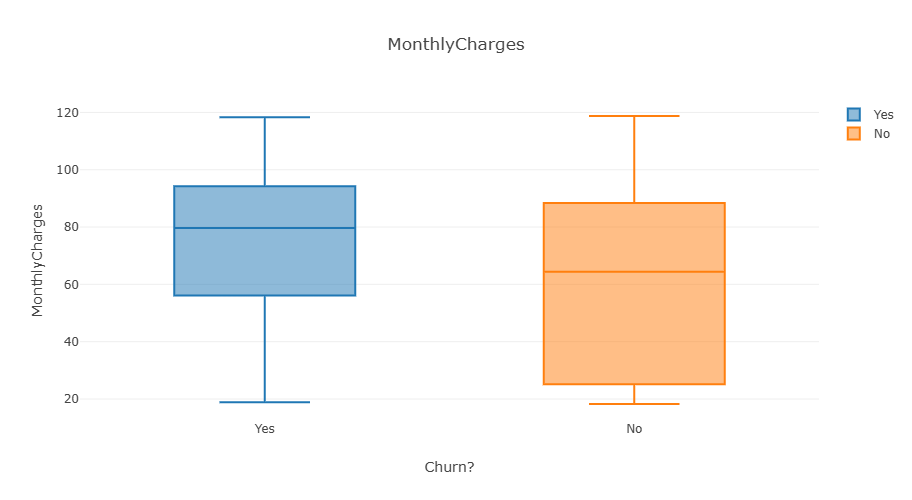

In [15]:
figs = []

for churn in churns:
    figs.append(
        go.Box(
            y = df.loc[(df['Churn']==churn),'MonthlyCharges'],
            name = churn
        )
    )
layout = go.Layout(
    title = "MonthlyCharges",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "MonthlyCharges"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)

<h3>EDA: Target</h3>

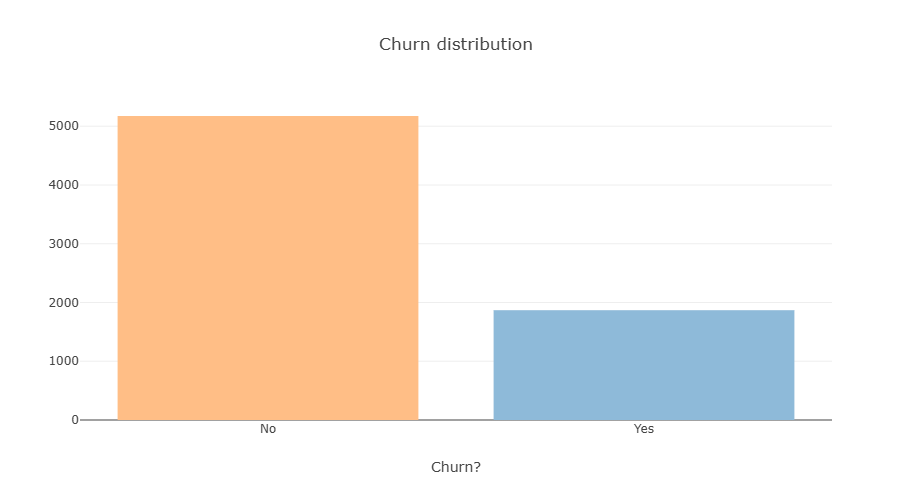

In [16]:
_ = df.groupby('Churn').size().reset_index()
# .sort_values(by='tenure', ascending=True)

data = [go.Bar(
    x = _['Churn'].tolist(),
    y = _[0].tolist(),
    marker=dict(
        color=['rgba(255,190,134,1)', 'rgba(142,186,217,1)'])
)]
layout = go.Layout(
    title = "Churn distribution",
    xaxis = {"title" : "Churn?"},
    width=800,
    height=500
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Insights from our simple EDA:<br>
* We can see a difference between our target classes on tenure as you can see in the first boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
* There is also a slight difference between our target classes on monthly charges as shown in the second boxplot.
* The barchart above shows a huge imbalance in our target classes, this may affect the prediction of our model. We may have to deal with this later.

<h3>Logistic Regression in action</h3>

Before we start predicting, an important step to do is to convert our **Churn** feature, which is a string, into integer. *Yes* will be converted to 1 and *No* will be converted to 0. We will name this new columns a "class".

In [17]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
X2 = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

Let us try first loss minimization with gradient descent and calculate the accuracy of our model.

In [18]:
start_time = time.time()

num_iter = 100000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):70.48961067199707 seconds
Learning rate: 0.1
Iteration: 100000


In [19]:
result = sigmoid(X, theta)

In [20]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['class']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


68.7349140991055

Now let us try maximum likelihood estimation and compute the accuracy

In [21]:
start_time = time.time()
num_iter = 100000

intercept2 = np.ones((X2.shape[0], 1))
X2 = np.concatenate((intercept2, X2), axis=1)
theta2 = np.zeros(X2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(X2, theta2)
    gradient2 = gradient_ascent(X2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

overflow encountered in exp



Training time (Log Reg using MLE):64.19352316856384seconds
Learning rate: 0.1
Iteration: 100000


In [22]:
result2 = sigmoid(X2, theta2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

overflow encountered in exp



In [23]:
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['class']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


73.4630129206304

Next, let us try using sklearn's LogisticRegression module

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=100000)
clf.fit(df[['tenure','MonthlyCharges']], y)
print("Training time (sklearn's LogisticRegression module):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (sklearn's LogisticRegression module):64.2769365310669 seconds
Learning rate: 0.1
Iteration: 100000


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [25]:
result3 = clf.predict(df[['tenure','MonthlyCharges']])

In [26]:
print("Accuracy (sklearn's Logistic Regression):")
f3 = pd.DataFrame(result3).join(y)
f3.loc[f3[0]==f3['class']].shape[0] / f3.shape[0] * 100

Accuracy (sklearn's Logistic Regression):


78.44668465142695

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import time

# Function to compute the sigmoid function
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

# Function for logistic regression loss calculation (for gradient descent)
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Function for gradient descent
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

# Function to update weights for logistic regression (gradient descent method)
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

# Function to train logistic regression model using gradient descent
def train_log_reg_gradient_descent(X, y, num_iter=100000, learning_rate=0.1):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    theta = np.zeros(X.shape[1])

    for i in range(num_iter):
        h = sigmoid(X, theta)
        gradient = gradient_descent(X, h, y)
        theta = update_weight_loss(theta, learning_rate, gradient)

    return theta

# Load data
data = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preprocessing
# Convert 'TotalCharges' to numeric (handling non-numeric values)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)  # Filling NaN values with mean

# Encode categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select relevant features for the model
X = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner', 'Dependents', 'PhoneService']].copy()
y = data['Churn'].copy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model using gradient descent (or use sklearn Logistic Regression)
start_time = time.time()
theta = train_log_reg_gradient_descent(X_train, y_train, num_iter=100000, learning_rate=0.1)
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")

# Alternatively, you can use sklearn's LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=100000)
clf.fit(X_train, y_train)
print("Training time (sklearn's LogisticRegression module):" + str(time.time() - start_time) + " seconds")

# Accuracy Calculation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Function to predict churn based on input data
def predict_churn(tenure, monthly_charges, total_charges, gender, partner, dependents, phone_service, model="sklearn", theta=None):
    new_data = np.array([1, tenure, monthly_charges, total_charges, gender, partner, dependents, phone_service])  # Adding intercept (1)
    
    if model == "manual":
        # For custom logistic regression model (using gradient descent)
        result = sigmoid(new_data, theta)
        prob = result[0]
        return f"Probability of churn: {prob:.4f} ({'Customer is likely to churn' if prob >= 0.5 else 'Customer is likely to stay'})"
    else:
        # For sklearn Logistic Regression model
        prob = clf.predict_proba([new_data[1:]])[0, 1]
        return f"Probability of churn: {prob:.4f} ({'Customer is likely to churn' if prob >= 0.5 else 'Customer is likely to stay'})"

# Asking all the necessary questions to the user
print("Please provide the following information:")

tenure = float(input("Enter tenure (in months): "))
monthly_charges = float(input("Enter Monthly Charges: "))
total_charges = float(input("Enter Total Charges: "))
gender = int(input("Enter Gender (0 for Female, 1 for Male): "))
partner = int(input("Enter Partner (0 for No, 1 for Yes): "))
dependents = int(input("Enter Dependents (0 for No, 1 for Yes): "))
phone_service = int(input("Enter PhoneService (0 for No, 1 for Yes): "))

# Predict churn based on user input using the sklearn model
result = predict_churn(tenure, monthly_charges, total_charges, gender, partner, dependents, phone_service, model="sklearn")

# Output the prediction result
print(result)

# Print additional insights
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, clf.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# If you want to use the manual logistic regression model (gradient descent)
# result_manual = predict_churn(tenure, monthly_charges, total_charges, gender, partner, dependents, phone_service, model="manual", theta=theta)
# print(result_manual)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training time (Log Reg using Gradient descent):62.86402869224548 seconds
Training time (sklearn's LogisticRegression module):62.98300790786743 seconds
Please provide the following information:


Enter tenure (in months):  15
Enter Monthly Charges:  79.99
Enter Total Charges:  1200.00
Enter Gender (0 for Female, 1 for Male):  1
Enter Partner (0 for No, 1 for Yes):  1
Enter Dependents (0 for No, 1 for Yes):  0
Enter PhoneService (0 for No, 1 for Yes):  1


Probability of churn: 0.5218 (Customer is likely to churn)

Model Accuracy: 80.13%

Model Coefficients:
tenure: -0.0668
MonthlyCharges: 0.0309
TotalCharges: 0.0002
gender: 0.0012
Partner: 0.1174
Dependents: -0.4459
PhoneService: -0.9506


Insights from the training, prediction and simple evaluation that we've done: <br>
We've accomplished our second objective which is to implement a Logistic Regression without the help of built-in libraries (except numpy of course). <br>
We've predicted and computed the accuracy of three different models
1. Log Regression from scratch using loss minimization. 
1. Log Regression from scratch using maximum likelihood estimation.
1. Log Regression class of sklearn.
    

<h2>Summary and Conclusion</h2>

In this kernel, we've created a logistic regression from scratch. We've learned the computations happening at the back-end of a Logistic Regression. We've transormed these equations and mathematical functions into python codes. We've trained our logistic regression function in two ways: through loss minimizing using gradient descent and maximizing the likelihood using gradient ascent. The Telco Customer Churn dataset was used for training and also evaluation. Below is the result of the evaluation (not dynamic)

<table>
    <tr>
        <td>**LR model**</td>
        <td>**training time (7043 records)**</td>
        <td>**training accuracy**</td>
    </tr>
     <tr>
        <td>Loss function + Gradient descent</td>
        <td>56 seconds</td>
        <td>68.5%</td>
    </tr>
     <tr>
        <td>MLE + Gradient ascent</td>
        <td>49 seconds</td>
        <td>73.07%</td>
    </tr>
    <tr>
        <td>sklearn</td>
        <td>49 seconds</td>
        <td>78%</td>
    </tr>
</table><br>
While the table shows that MLE + Gradient ascent is better than the other method, we have to consider the number of training iterations we've set as well as other hyperparameters. I randomly chose 100,000 as the number of iteration for this exercise, increasing or decreasing it might change the result, that's yours to find out. Also we've only chosen **tenure** and **monthlyCharges** as our features to simplify things, there might be important features that we need to include in the future to make the algorithm perform better, again that's yours to find out. Despite all of these, our function performed quite well I would say, (LOL) it's not that far out from the accuracy of sklearn, however there are other metrics to consider in comparing these models, that's also yours to find out. <br>
To wrap things up let us review our objectives and wether we've accomplished them. The first objective was to understand the theory behind Logistic Regression. We've discussed that in the section **Logistic Regression behind the mask**, and I do hope that we all understood the things I stated there. The second objective was to implement the Logistic Regression without using built-in Logistic Regression libraries, yes we've done that in the section **Logistic Regression in action**, it was trained, and evaluated. In the same section, we have also predicted the churn of the customers in the Telco Customer Churn dataset. <br><br>
This logistic regression implementation would probably be never used in production and it is unlikely that it will defeat sklearn's own LogisticRegression module, however the goal of this kernel was to understand intrecately the structure of different algorithms, in this case, Logistic Regression. Stay tuned, for more of this kind of kernels. If you liked this kernel please leave an upvote, thank you.

<h2>References:</h2><br>
This kernel was heavily influenced by the following:
* https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
* https://beckernick.github.io/logistic-regression-from-scratch/